In [1]:
import jax.numpy as jnp
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from tqdm import tqdm_notebook
from qmp.utils.bivariate_copula import log_Huv,ndtri_
from scipy.stats import gaussian_kde

# Setup Colours

In [2]:
palette = sns.color_palette("gist_earth", 6)
color_codes = ['1', '2','3','4','5','6']
c = lambda x: palette[color_codes.index(x)]


In [3]:
du = 1e-3
u_plot = np.arange(du,1-du,du)

yn = 0.5
Q0 = ndtri_(u_plot)
v = sp.stats.norm.cdf(yn)
v = 0.7

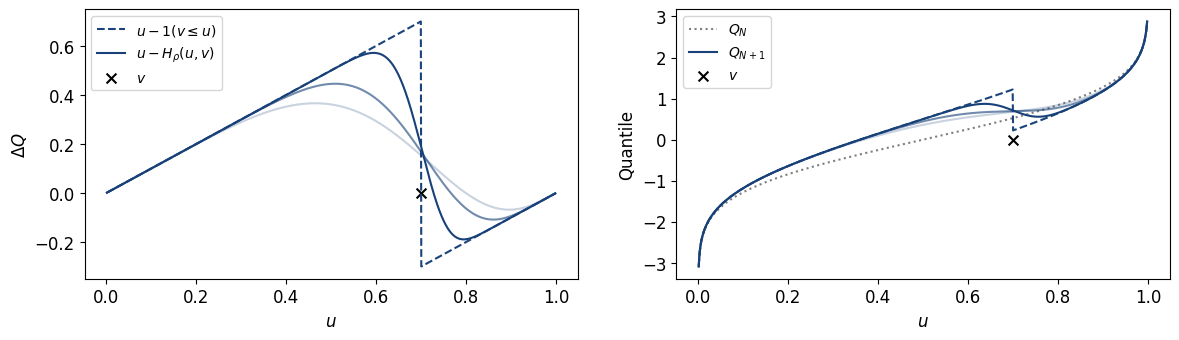

In [4]:
def deltaQ(u_plot,v,rho):
    return(u_plot - np.exp(log_Huv(u_plot,v,rho)))


f =plt.figure(figsize=(14,3.5))
plt.subplot(1,2,1)

plt.plot(u_plot,u_plot - (v <=u_plot),color = c('1'), linestyle = '--',alpha = 0.99,label = r'$u - 1(v\leq u)$')
#plt.plot(u_plot,Q0)

rho =0.99
rho_range = np.array([0.99,0.95,0.9])
j = 0.99
plt.plot(u_plot,deltaQ(u_plot,v,rho),label = r'$u - H_\rho(u,v)$',color = c('1'))
j= j- 0.38
for rho in rho_range[1:]:
    plt.plot(u_plot,u_plot - np.exp(log_Huv(u_plot,v,rho)),color = c('1'),alpha = j)
    j = j - 0.38

plt.scatter([v],[0], s= 50, color = 'k',label = r'$v$',marker = 'x')

plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
plt.xlabel(r'$u$',fontsize = 12)
plt.ylabel(r'$\Delta Q$',fontsize=12)
plt.legend(loc =2)

plt.subplot(1,2,2)
weight = 1
plt.plot(u_plot,Q0,color = 'k', linestyle = ':',alpha = 0.5,label = r'$Q_{N}$')
plt.plot(u_plot,Q0+weight*(u_plot - (v <= u_plot)),color = c('1'), linestyle = '--',alpha = 0.99)

rho =0.99
rho_range = np.array([0.99,0.95,0.9])
j = 0.99
plt.plot(u_plot,Q0 + weight*deltaQ(u_plot,v,rho),label = r'$Q_{N+1}$',color = c('1'))
j= j- 0.38
for rho in rho_range[1:]:
    plt.plot(u_plot,Q0 + weight*deltaQ(u_plot,v,rho),color = c('1'),alpha = j)
    j = j - 0.38

plt.scatter([v],[0], s= 50, color = 'k',marker = 'x',label = r'$v$')

plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
plt.xlabel(r'$u$',fontsize = 12)
plt.ylabel(r'Quantile',fontsize=12)
plt.legend()
f.savefig('quant_copula.pdf', bbox_inches='tight')

# Rearrangement plot

In [5]:
Qn = Q0+5*deltaQ(u_plot,0.5,rho)

#Rearrangement
y_plot = np.arange(-3,3,0.01)
Pn_dag = np.zeros(len(y_plot))
Qn_dag = np.zeros(len(u_plot))
for i in range(len(y_plot)):
    Pn_dag[i] = np.sum(du*(Qn <=y_plot[i]))

for i in range(len(u_plot)):
    Qn_dag[i] = y_plot[np.argmin(np.abs(Pn_dag- u_plot[i]))]

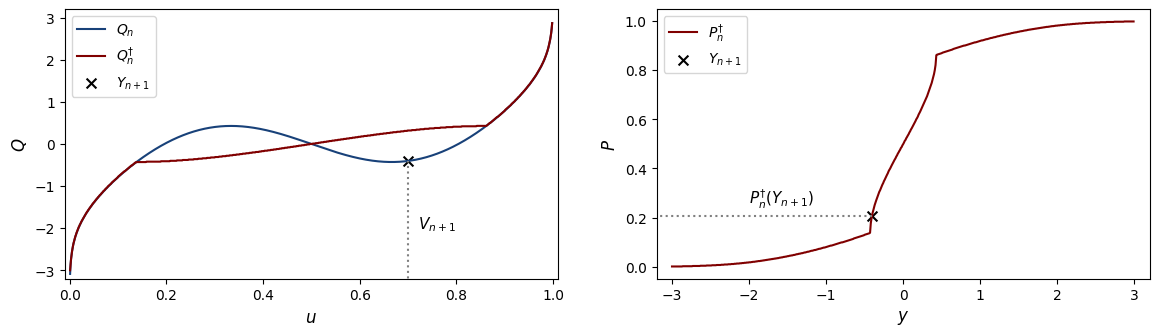

In [6]:
f =plt.figure(figsize=(14,3.5))
plt.subplot(1,2,1)
plt.plot(u_plot,Qn,color = c('1'), label = r"$Q_n$")
plt.plot(u_plot,Qn_dag,color = 'maroon',label = r"$Q_n^{\dagger}$")
plt.xlabel(r'$u$',fontsize = 12)
plt.ylabel(r'$Q$',fontsize = 12)
v = 0.7
Y_samp = Qn[np.argmin(np.abs(u_plot - v))]
plt.vlines(x = v,ymin = np.min(Qn)-0.5,ymax = Y_samp,linestyle = ":",color = 'gray')
#plt.hlines(y = Y_samp,xmin = -0.05,xmax = v,linestyle = ":",color = 'gray')

plt.scatter([v],Y_samp, s= 50, color = 'k',marker = 'x',label = r'$Y_{n+1}$')
plt.annotate(r'$V_{n+1}$',xy = (0.72,-2),fontsize = 11)
#plt.annotate(r'$V_{n+1}$',xy = (0.66,-3.6),annotation_clip = False,fontsize = 11)
plt.legend()
plt.ylim(-3.2,3.2)
plt.xlim(-0.01,1.01)

plt.subplot(1,2,2)
plt.plot(y_plot, Pn_dag,color = 'maroon',label = r'$P_n^{\dagger}$')
v_samp = u_plot[np.argmin(np.abs(Y_samp - Qn_dag))]
plt.hlines(y =v_samp,xmin = np.min(Qn)-0.5,xmax = Y_samp,linestyle = ":",color = 'gray')
plt.scatter(Y_samp,v_samp,s= 50, color = 'k',marker = 'x',label = r'$Y_{n+1}$')

plt.annotate(r'$P_n^{\dagger}(Y_{n+1})$',xy = (-2,v_samp+0.05),fontsize = 11)


plt.xlabel(r'$y$',fontsize = 12)
plt.ylabel(r'$P$',fontsize = 12)
# plt.ylim(-0.01,1.01)
plt.xlim(-3.2,3.2)
plt.legend()
f.savefig('rearrangement.pdf', bbox_inches='tight')
